In [1]:
%matplotlib inline
import importlib
from pytorch_utils_oh_1 import *

Pytorch utils oh: pytorch_utils_oh_1.py
Pytorch: 0.2.0_4


In [2]:
MODEL_SAVE_PATH = 'category_5_mod_data_common_words'

import pytorch_utils_oh_1; importlib.reload(pytorch_utils_oh_1); from pytorch_utils_oh_1 import *;

# Data loading

In [3]:
all_data = pickle.load(open("data/en_train_not_changed_1.pkl", "rb" ))
all_data_sentence_index = all_data.set_index('sentence_id')

In [4]:
all_data.sample(5)

,sentence_id,token_id,class,before,after
5079179,388288,13,NOT_CHANGED,room,room
1242433,97921,4,NOT_CHANGED,the,the
6173874,470131,11,NOT_CHANGED,spam,spam
335986,26999,13,NOT_CHANGED,.,.
8865962,670065,6,NOT_CHANGED,Casas,Casas


In [5]:
categories_all = all_data["class"].unique()
print(categories_all)
print(len(categories_all))
categories_index = dict((c, i) for i, c in enumerate(categories_all))

['NOT_CHANGED' 'NUMBERS' 'LETTERS' 'PLAIN' 'VERBATIM' 'ELECTRONIC']
6


### Letters all

In [6]:
tmp = sorted(list(set(''.join(all_data['before']))))
characters_all = ['<EOS>', '<SOS>'] + sorted(list(set(tmp)))
characters_all_index = dict((c, i) for i, c in enumerate(characters_all))
print(''.join(characters_all))
print(len(characters_all))

<EOS><SOS> !"#$%&'()+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZ[]_abcdefghijklmnopqrstuvwxyz|~¡£¥ª«²³µº»¼½¾¿éɒʻˈΩμ—€⅓⅔⅛⅝⅞☒
115


In [82]:
characters_all_index['~']

86

In [101]:
tmp = characters_all[characters_all_index['|']]
print(tmp)
all_data[all_data['before'].str.contains(tmp)]

|


,sentence_id,token_id,class,before,after
0,0,0,NOT_CHANGED,Brillantaisia,Brillantaisia
1,0,1,NOT_CHANGED,is,is
2,0,2,NOT_CHANGED,a,a
3,0,3,NOT_CHANGED,genus,genus
4,0,4,NOT_CHANGED,of,of
5,0,5,NOT_CHANGED,plant,plant
6,0,6,NOT_CHANGED,in,in
7,0,7,NOT_CHANGED,family,family
8,0,8,NOT_CHANGED,Acanthaceae,Acanthaceae
9,0,9,NOT_CHANGED,.,.


In [72]:
all_data[all_data['before'].str.contains('Ω')]

,sentence_id,token_id,class,before,after
3611880,278101,4,VERBATIM,Ω,omega
6422501,488501,1,VERBATIM,Ω,omega
6883914,522809,0,NUMBERS,50 Ω,fifty ohms
8097483,613302,4,VERBATIM,Ω,omega


### Common words

In [7]:
common_words, common_words_index = load_common_words_100()
len(common_words)

7381

### More balanced sample

In [8]:
all_data.groupby("class")["class"].count()

class
ELECTRONIC        4964
LETTERS         144364
NOT_CHANGED    9218584
NUMBERS         448151
PLAIN            36472
VERBATIM         65855
Name: class, dtype: int64

In [51]:
balanced_data_classes_select = list(all_data.groupby('class'))

balanced_data_accessed_counter = 0 
balanced_data_length = 0
def balanced_data_randomize(max_len=20000):
    global balanced_data, balanced_data_length, balanced_data_accessed_counter
    balanced_data = pd.concat([v.sample(min(max_len, len(v))) for k, v in balanced_data_classes_select])
    balanced_data_length = len(balanced_data)
    balanced_data_accessed_counter = 0

def balanced_data_sample_row():
    global balanced_data_accessed_counter
    global balanced_data_last_sample
    balanced_data_accessed_counter += 1
    if balanced_data_accessed_counter/balanced_data_length > 0.2:
        balanced_data_randomize()
    balanced_data_last_sample = balanced_data.iloc[random.randint(1, balanced_data_length-1)]
    return balanced_data_last_sample
    
balanced_data_randomize()

In [10]:
balanced_data.groupby("class")["class"].count()

class
ELECTRONIC      4964
LETTERS        20000
NOT_CHANGED    20000
NUMBERS        20000
PLAIN          20000
VERBATIM       20000
Name: class, dtype: int64

### Samples

In [14]:
def get_random_sample():
    sample_row = balanced_data_sample_row()
    sentence_id = sample_row['class']

    rows = all_data_sentence_index.loc[sample_row['sentence_id']]
    befores = list(rows.before)
        
    token_id_idx = list(rows['token_id']).index(sample_row['token_id'])
    befores[token_id_idx] = SAMPLE_WORD_TOKEN
    
    return sample_row['before'], sample_row['after'], sample_row['class'], befores
            
def tmp():
    s_bef, s_aft, s_class, s_sentence = get_random_sample()
    print(s_class, ':', s_bef, '->', s_aft)
    print(' '.join(s_sentence))
    print(s_sentence)
    print(words_to_tensor(list(s_sentence), common_words_index).shape)
    print(string_to_tensor(s_bef, characters_all_index).shape)
tmp()

LETTERS : M. -> m
ISBN 1 - 579 - 58411- X . Berard , Jeanette <SAMPLE> ; Englund , Klaudia ( 2009 ) .
['ISBN', '1', '-', '579', '-', '58411-', 'X', '.', 'Berard', ',', 'Jeanette', '<SAMPLE>', ';', 'Englund', ',', 'Klaudia', '(', '2009', ')', '.']
torch.Size([1, 21, 7381])
torch.Size([1, 3, 115])


# Model

In [15]:
class CategorizeRNN(nn.Module):
    def __init__(self, output_size, words_input_size, chars_input_size, words_hidden_size, chars_hidden_size,
                 words_dropout=0, chars_dropout=0, words_layers=1, chars_layers=1):
        super(CategorizeRNN, self).__init__()
        
        self.words_layers = words_layers
        self.chars_layers = chars_layers
        self.words_hidden_size = words_hidden_size
        self.chars_hidden_size = chars_hidden_size

        self.rnn_words = nn.LSTM(words_input_size, words_hidden_size // 2, words_layers,
                                 dropout=words_dropout, batch_first=True, bidirectional=True)

        self.rnn_chars = nn.LSTM(chars_input_size, chars_hidden_size // 2, chars_layers,
                                 dropout=chars_dropout, batch_first=True, bidirectional=True)
        
        self.lin_output = nn.Linear(words_hidden_size+chars_hidden_size, output_size)
        
    def forward(self, words_tensor, string_tensor, init_hidden = True):
        if init_hidden:
            hidden_words, hidden_chars = self.init_hidden()
        
        all_outputs_words, hidden_words = self.rnn_words(words_tensor, hidden_words)
        output_words = all_outputs_words[:, -1]
        
        all_outputs_chars, hidden_chars = self.rnn_chars(string_tensor, hidden_chars)
        output_chars = all_outputs_chars[:, -1]
        
        output = torch.cat((output_words, output_chars), 1)
        
        #output = self.lin_1(output)
        output = self.lin_output(output)
        output = F.log_softmax(output)
        
        return output

    def init_hidden(self):
        var1_1 = Variable(torch.zeros(2 * self.words_layers, 1, self.words_hidden_size // 2))
        var1_2 = Variable(torch.zeros(2 * self.words_layers, 1, self.words_hidden_size // 2))
        var2_1 = Variable(torch.zeros(2 * self.chars_layers, 1, self.chars_hidden_size // 2))
        var2_2 = Variable(torch.zeros(2 * self.chars_layers, 1, self.chars_hidden_size // 2))
        var1_1 = var1_1.cuda(); var1_2 = var1_2.cuda()
        var2_1 = var2_1.cuda(); var2_2 = var2_2.cuda()
        return ((var1_1, var1_2), (var2_1, var2_2))

In [16]:
model = CategorizeRNN(len(categories_all), 
                      words_input_size=len(common_words), chars_input_size=len(characters_all),
                      words_hidden_size=128, chars_hidden_size=128,
                      words_layers=2, chars_layers=2,
                      words_dropout=0.2, chars_dropout=0.2)
model = model.cuda()

model_training = ModelTraining(MODEL_SAVE_PATH, [model])

model

Save path: data/models/category_5_mod_data_common_words


CategorizeRNN (
  (rnn_words): LSTM(7381, 64, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (rnn_chars): LSTM(115, 64, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (lin_output): Linear (256 -> 6)
)

### Accuracy

In [17]:
def test_model_single_sample(model):
    s_bef, s_aft, s_class, s_sentence = sample = get_random_sample()
    
    words_t = words_to_tensor(list(s_sentence), common_words_index)
    words_t = Variable(words_t).cuda()
    
    string_t = string_to_tensor(s_bef, characters_all_index)
    string_t = Variable(string_t).cuda()
    
    output = model(words_t, string_t)
    guess = category_from_output(output, categories_all)

    return output, guess, (s_class, categories_index[s_class]), sample
    
tmp = test_model_single_sample(model)
tmp

(Variable containing:
 -1.7563 -1.8346 -1.8035 -1.7683 -1.8423 -1.7497
 [torch.cuda.FloatTensor of size 1x6 (GPU 0)],
 ('ELECTRONIC', 5),
 ('NOT_CHANGED', 0),
 ('in',
  'in',
  'NOT_CHANGED',
  ['He',
   'remained',
   'at',
   'Berne',
   'until',
   'December 1905',
   'and',
   'was',
   'appointed',
   'Minister',
   'to',
   'Romania',
   '<SAMPLE>',
   'January 1906',
   '.']))

In [18]:
%%time
test_model_accuracy(model, test_model_single_sample)

Accuracy: 4.52% (     452/   10000)
CPU times: user 2min 44s, sys: 1.47 s, total: 2min 45s
Wall time: 42.8 s


0.0452

### Training

In [19]:
def train(model, s_category, s_sentence, s_bef, loss_function, optimizer):
    
    category_tensor = Variable(torch.LongTensor([categories_index[s_category]])).cuda()
    
    words_t = words_to_tensor(list(s_sentence), common_words_index)
    words_t = Variable(words_t).cuda()
    
    string_t = string_to_tensor(s_bef, characters_all_index)
    string_t = Variable(string_t).cuda()
    
    output = model(words_t, string_t)
    loss = loss_function(output, category_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    return output, loss.data[0]

In [20]:
def train_iterations(n_iters=100000, lr=0.001, print_every=10000, plot_every=1000):

    start = time.time()
    model.train()

    current_loss = 0
    current_loss_iter = 0

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss_function = nn.NLLLoss()
    
    for iteration in range(1, n_iters + 1):
        model_training.iterations += 1
        
        s_bef, s_aft, s_class, s_sentence = get_random_sample()
        
        result, loss = train(model=model, s_category=s_class, s_sentence=s_sentence,
                             s_bef=s_bef, optimizer=optimizer, loss_function=loss_function)

        current_loss += loss
        current_loss_iter += 1

        # Print iter number, loss, name and guess
        if iteration % print_every == 0:
            guess, guess_i = category_from_output(result, categories_all)
            correct = '✓' if guess == s_class else "✗ {}".format(s_class)
            print("{:>6d} {:>4.0%} ({:>8}) {:>7.3f}   | {:>6.2f}: {} -> {} ({})".format(
                      model_training.iterations, iteration/n_iters, time_since(start),
                      current_loss/current_loss_iter, loss,
                      s_bef, guess, correct))

        # Add current loss avg to list of losses
        if iteration % plot_every == 0:
            model_training.losses.append(current_loss / plot_every)
            model_training.learning_rates.append(lr)
            current_loss = 0
            current_loss_iter = 0
            
        if model_training.iterations % 50000 == 0 or model_training.iterations == 10:
            model_training.save_models()
            acc = test_model_accuracy(model, test_model_single_sample)
            model_training.accuracy.append(acc)
    
    # test_model_accuracy(model, n_sample=10000)

In [21]:
train_iterations(n_iters=50, print_every=9, lr=0.0001)

     9  18% (   0m 0s)   1.793   |   1.76: mr -> ELECTRONIC (✗ PLAIN)
Saved model to data/models/category_5_mod_data_common_words/10_(CategorizeRNN)
Accuracy: 4.42% (     442/   10000)
    18  36% (  0m 42s)   1.795   |   1.81: AD -> PLAIN (✗ LETTERS)
    27  54% (  0m 42s)   1.799   |   1.75: vol -> PLAIN (✓)
    36  72% (  0m 43s)   1.799   |   1.78: Sofia -> PLAIN (✗ NOT_CHANGED)
    45  90% (  0m 43s)   1.794   |   1.75: Elisabeth -> PLAIN (✓)


In [22]:
train_iterations(n_iters=(1000-model_training.iterations), print_every=500, lr=0.0001)

   550  53% (   0m 7s)   1.752   |   1.51: pp -> VERBATIM (✓)


In [37]:
train_iterations(n_iters=10000, lr=0.0001, print_every=1000)

  2000  10% (   0m 9s)   1.337   |   1.59: - -> LETTERS (✗ PLAIN)
  3000  20% (  0m 19s)   1.105   |   0.41: September 22, 2012 -> NUMBERS (✓)
  4000  30% (  0m 32s)   0.826   |   1.75: ) -> PLAIN (✗ NOT_CHANGED)
  5000  40% (  0m 45s)   0.702   |   0.46: 80 -> NUMBERS (✓)
  6000  50% (  0m 59s)   0.613   |   0.02: ☒ -> VERBATIM (✓)
  7000  60% (  1m 12s)   0.604   |   0.74: : -> PLAIN (✓)
  8000  70% (  1m 26s)   0.523   |   0.00: ☒ -> VERBATIM (✓)
  9000  80% (  1m 39s)   0.499   |   0.06: ☒ -> VERBATIM (✓)
 10000  90% (  1m 52s)   0.472   |   0.39: stabilisation -> PLAIN (✓)
 11000 100% (   2m 5s)   0.489   |   0.50: one -> NOT_CHANGED (✓)


In [38]:
print_local_wrong_predictions()

NOT_CHANGED ->       PLAIN (0.482) ||       in -> in == Non immune diseases with etiological origins <SAMPLE> inflammatory processes include cancer , atherosclerosis , and ischaemic heart disease .
   VERBATIM ->       PLAIN (0.335) ||       Cr -> c r == The Mayor of the City is <SAMPLE> .
      PLAIN -> NOT_CHANGED (0.505) ||      vol -> volume == " Chassidic Sects Battle Each Other " , Canadian Jewish News , April 1, 1977 Sichot Kodesh 5736 , <SAMPLE>
NOT_CHANGED ->       PLAIN (0.508) ||       as -> as == 2007 : The Employees Provident Fund ( EPF ) emerged <SAMPLE> the single largest shareholder of RHB Capital .
NOT_CHANGED ->       PLAIN (0.521) || appearances -> appearances == 15 Include 5 <SAMPLE> in 2010 Campeonato Cearense Segunda Divisao .
NOT_CHANGED ->       PLAIN (0.466) ||        , -> , == On television , Rampling played the gunfighter Hana Wilde in " The Superlative Seven " <SAMPLE> a 1967 episode of The Avengers .
      PLAIN -> NOT_CHANGED (0.703) || realises -> realize

In [39]:
train_iterations(n_iters=89000, print_every=10000)

 21000  11% (  2m 20s)   0.234   |   0.01: PDF -> LETTERS (✓)
 31000  22% (  4m 41s)   0.153   |   0.07: : -> PLAIN (✓)
 41000  34% (  6m 54s)   0.179   |   0.00: April 2001 -> NUMBERS (✓)
Saved model to data/models/category_5_mod_data_common_words/50000_(CategorizeRNN)
Accuracy: 96.59% (    9659/   10000)
 51000  45% (  9m 55s)   0.133   |   0.01: US -> LETTERS (✓)
 61000  56% ( 12m 10s)   0.105   |   0.02: - -> PLAIN (✓)
 71000  67% ( 14m 25s)   0.132   |   0.00: indiestar.tv -> ELECTRONIC (✓)
 81000  79% ( 16m 40s)   0.099   |   0.00: 1268 -> NUMBERS (✓)
 91000  90% ( 18m 57s)   0.083   |   0.01: UPFA -> LETTERS (✓)
Saved model to data/models/category_5_mod_data_common_words/100000_(CategorizeRNN)
Accuracy: 97.63% (    9763/   10000)


In [40]:
train_iterations(n_iters=100000, print_every=10000)

110000  10% (  2m 15s)   0.079   |   0.02: R. -> LETTERS (✓)
120000  20% (  4m 26s)   0.093   |   0.00: P. O. -> LETTERS (✓)
130000  30% (  6m 34s)   0.071   |   0.00: 57 -> NUMBERS (✓)
140000  40% (  8m 40s)   0.071   |   0.00: ☒ -> VERBATIM (✓)
150000  50% ( 10m 52s)   0.092   |   0.02: advertising -> PLAIN (✓)
Saved model to data/models/category_5_mod_data_common_words/150000_(CategorizeRNN)
Accuracy: 97.51% (    9751/   10000)
160000  60% ( 13m 45s)   0.085   |   0.00: http://www.nottinghamchurches.org/heritage/stm-heritage/stm-history/ -> ELECTRONIC (✓)
170000  70% ( 15m 53s)   0.084   |   0.00: theatre -> PLAIN (✓)
180000  80% (  18m 0s)   0.071   |   0.00: theatre -> PLAIN (✓)
190000  90% (  20m 7s)   0.056   |   0.00: ☒ -> VERBATIM (✓)
200000 100% ( 22m 13s)   0.071   |   0.23: No -> PLAIN (✓)
Saved model to data/models/category_5_mod_data_common_words/200000_(CategorizeRNN)
Accuracy: 98.37% (    9837/   10000)


In [41]:
print_local_wrong_predictions()

   VERBATIM ->     LETTERS (0.726) ||      rpg -> r p g == The following season , he elevated his performance with 23.0 ppg , 7.5 <SAMPLE> , and 3.4 apg .
NOT_CHANGED ->     LETTERS (0.594) ||    Upper -> Upper == To the south of it are the comparatively small <SAMPLE> Gardens ( Verhny Sad ) .
      PLAIN ->     LETTERS (0.927) ||       LN -> lane == Smirnov <SAMPLE> , Ozhin FV ( July 1970 ) .
   VERBATIM ->     LETTERS (0.981) ||     KMDb -> k m d b == <SAMPLE> Korean Movie Database .
NOT_CHANGED ->     LETTERS (0.678) ||      des -> des == Mit einem Anhang : Die Satira <SAMPLE> Johannes Falkenberg , Gottingen 1975 ( Habilitation ) ISBN 3-525-35354-5 Der Deutsche Orden .
NOT_CHANGED ->     LETTERS (0.999) ||      PAS -> PAS == " VCD alleges DAP <SAMPLE> ' secret pact ' ( subscription required ) " .
      PLAIN -> NOT_CHANGED (0.586) ||    Elisa -> eliza == Errando , Manel ; Lindfors , Elina ; Mazin , Daniel ; Prandini , <SAMPLE> ; Tavecchio , Fabrizio .
   VERBATIM ->     LETTERS (0.7

In [42]:
train_iterations(n_iters=200000, lr=0.0001, print_every=10000)

210000   5% (   2m 7s)   0.073   |   0.00: st -> PLAIN (✓)
220000  10% (  4m 16s)   0.040   |   0.00: ☒ -> VERBATIM (✓)
230000  15% (  6m 21s)   0.036   |   0.00: gacivilwar.org -> ELECTRONIC (✓)
240000  20% (  8m 29s)   0.037   |   0.00: 93 -> NUMBERS (✓)
250000  25% ( 10m 36s)   0.034   |   0.00: ☒ -> VERBATIM (✓)
Saved model to data/models/category_5_mod_data_common_words/250000_(CategorizeRNN)
Accuracy: 98.67% (    9867/   10000)
260000  30% ( 13m 18s)   0.038   |   0.08: size -> NOT_CHANGED (✓)
270000  35% ( 15m 26s)   0.065   |   0.00: RFT -> LETTERS (✓)
280000  40% ( 17m 33s)   0.068   |   0.00: Archived -> NOT_CHANGED (✓)
290000  45% ( 19m 41s)   0.047   |   0.00: winning -> NOT_CHANGED (✓)
300000  50% ( 21m 48s)   0.032   |   0.00: D. -> LETTERS (✓)
Saved model to data/models/category_5_mod_data_common_words/300000_(CategorizeRNN)
Accuracy: 98.73% (    9873/   10000)
310000  55% ( 24m 35s)   0.047   |   0.00: - -> PLAIN (✓)
320000  60% ( 26m 42s)   0.035   |   0.00: . -> NOT_C

In [43]:
print_local_wrong_predictions()

NOT_CHANGED ->       PLAIN (0.875) ||        : -> : == Carrie Catt <SAMPLE> Feminist Politician .
    LETTERS -> NOT_CHANGED (0.912) ||    oecus -> o e c u s == The <SAMPLE> , where the owner held meetings and banquets showing off his social status , was ended by a raised exedra .
NOT_CHANGED ->     LETTERS (0.902) ||      Maj -> Maj == <SAMPLE> Gen Thomas B.L. Churchill , CB , CBE , MC ( 1986 ) .
    NUMBERS -> NOT_CHANGED (0.607) ||        V -> five == " Putting Your Personal Stamp On Grand Theft Auto <SAMPLE> " .
    LETTERS -> NOT_CHANGED (0.572) ||     Ayra -> a y r a == <SAMPLE> gets mad at Edwin .
NOT_CHANGED ->     LETTERS (0.914) ||      Sec -> Sec == " Full cast and crew for Les Aventures extraordinaires d'Adele Blanc <SAMPLE> " .
NOT_CHANGED ->       PLAIN (0.901) ||        : -> : == Duration <SAMPLE> 40 minutes .
    LETTERS -> NOT_CHANGED (0.981) ||      bef -> b e f == 15 September 1358 ) A daughter ( b . <SAMPLE> .
    LETTERS ->    VERBATIM (0.814) ||    msnbc -> m s n 

In [44]:
train_iterations(n_iters=300000, lr=0.001, print_every=10000)

410000   3% (   2m 8s)   0.028   |   0.00: favourable -> PLAIN (✓)
420000   7% (  4m 16s)   0.044   |   0.00: 9.7 km -> NUMBERS (✓)
430000  10% (  6m 22s)   0.056   |   0.00: dr -> PLAIN (✓)
440000  13% (  8m 30s)   0.038   |   0.00: Retrieved -> NOT_CHANGED (✓)
450000  17% ( 10m 36s)   0.045   |   0.00: which -> NOT_CHANGED (✓)
Saved model to data/models/category_5_mod_data_common_words/450000_(CategorizeRNN)
Accuracy: 98.97% (    9897/   10000)
460000  20% ( 13m 23s)   0.073   |   0.01: does -> NOT_CHANGED (✓)
470000  23% ( 15m 30s)   0.051   |   0.00: PlayNow.com -> ELECTRONIC (✓)
480000  27% ( 17m 37s)   0.052   |   0.00: Although -> NOT_CHANGED (✓)
490000  30% ( 19m 45s)   0.032   |   0.00: Turkey -> NOT_CHANGED (✓)
500000  33% ( 21m 51s)   0.039   |   0.01: part -> NOT_CHANGED (✓)
Saved model to data/models/category_5_mod_data_common_words/500000_(CategorizeRNN)
Accuracy: 98.69% (    9869/   10000)
510000  37% ( 24m 37s)   0.061   |   0.00: 1980 -> NUMBERS (✓)
520000  40% ( 26m 3

In [45]:
print_local_wrong_predictions()

    LETTERS -> NOT_CHANGED (0.981) ||     Cild -> c i l d == Cyril Hart suggested that Uhtred <SAMPLE> was Uhtred's son , and that Uhtred succeeded his father as ealdorman .
      PLAIN ->    VERBATIM (0.85) ||       lb -> pound == Listed at 5' 5 " , 115 <SAMPLE>
NOT_CHANGED ->     LETTERS (0.915) ||      Vis -> Vis == Richard Lord <SAMPLE> Count Wenman deceased . '
    LETTERS -> NOT_CHANGED (0.92) ||   Jiu'er -> j i u e r == Meanwhile , a group of bandits kidnap <SAMPLE> , forcing the distillery workers to pay a ransom for her freedom .
NOT_CHANGED ->     LETTERS (0.932) ||       AM -> AM == He retired in 1995 as Vice President and General Manager of station WWRL- <SAMPLE> in New York City .
   VERBATIM -> NOT_CHANGED (0.392) ||        ~ -> tilde == Rescue Drive ~ Car Navi tsuki <SAMPLE> Soreike !
    NUMBERS ->     LETTERS (0.979) ||       V. -> the fifth == Robert <SAMPLE> Hine , John Mack Faragher ( 2000 ) .
    NUMBERS ->     LETTERS (0.953) ||    XXXIV -> thirty four == " Super 

In [46]:
train_iterations(n_iters=300000, lr=0.0001, print_every=25000)

725000   8% (  5m 16s)   0.036   |   0.00: on -> NOT_CHANGED (✓)
750000  17% ( 10m 34s)   0.023   |   0.00: ☒ -> VERBATIM (✓)
Saved model to data/models/category_5_mod_data_common_words/750000_(CategorizeRNN)
Accuracy: 99.19% (    9919/   10000)
775000  25% ( 16m 30s)   0.012   |   0.00: honour -> PLAIN (✓)
800000  33% ( 21m 46s)   0.028   |   0.00: 58 -> NUMBERS (✓)
Saved model to data/models/category_5_mod_data_common_words/800000_(CategorizeRNN)
Accuracy: 99.22% (    9922/   10000)
825000  42% ( 27m 45s)   0.016   |   0.00: 26 -> NUMBERS (✓)
850000  50% (  33m 1s)   0.014   |   0.00: - -> PLAIN (✓)
Saved model to data/models/category_5_mod_data_common_words/850000_(CategorizeRNN)
Accuracy: 99.13% (    9913/   10000)
875000  58% ( 38m 58s)   0.016   |   0.00: - -> PLAIN (✓)
900000  67% ( 44m 14s)   0.020   |   0.00: vs -> PLAIN (✓)
Saved model to data/models/category_5_mod_data_common_words/900000_(CategorizeRNN)
Accuracy: 99.16% (    9916/   10000)
925000  75% ( 50m 11s)   0.034   |

In [47]:
print_local_wrong_predictions()

NOT_CHANGED ->     LETTERS (0.966) ||      Zhi -> Zhi == Eventually , Tao Hua , Yu Yi , <SAMPLE> Qiang , and Hui Qi are the four students selected to enter the school .
      PLAIN ->     LETTERS (0.528) || S.H.I.E.L.D. -> shield == " Tuesday Final Ratings : ' Marvel's Agents of <SAMPLE> ' , ' NCIS ' & ' Chicago Fire ' Adjusted Up ; ' Trophy Wife ' Adjusted Down " .
NOT_CHANGED ->     LETTERS (0.997) ||   BURDEN -> BURDEN == " BEASTS OF <SAMPLE> RETURNS IN DARK HORSE PRESENTS # 4 " .
NOT_CHANGED ->     LETTERS (0.765) ||     Shri -> Shri == Gurudwara <SAMPLE> Toot Sahib is the historical Sikh temple situated in the Amritsar City of Punjab .
      PLAIN ->     LETTERS (0.996) || CHVRCHES -> churches == " Studio Brussel : <SAMPLE> — The Mother We Share ( Live ) " .
NOT_CHANGED ->     LETTERS (0.999) ||       WA -> WA == " <SAMPLE> fires force evacuations , residents unable to return home " .
NOT_CHANGED ->     LETTERS (0.691) ||      Sir -> Sir == The race is named after the Australian m

In [49]:
train_iterations(n_iters=300000, lr=0.0001, print_every=10000)

1010000   3% (  1m 47s)   0.025   |   0.00: 2010 -> NUMBERS (✓)
1020000   7% (  3m 39s)   0.015   |   0.00: - -> PLAIN (✓)
1030000  10% (  5m 23s)   0.018   |   0.00: ☒ -> VERBATIM (✓)
1040000  13% (   7m 7s)   0.034   |   0.00: grovemusic.com -> ELECTRONIC (✓)
1050000  17% (  8m 46s)   0.021   |   0.00: RMP -> LETTERS (✓)
Saved model to data/models/category_5_mod_data_common_words/1050000_(CategorizeRNN)
Accuracy: 99.28% (    9928/   10000)
1060000  20% ( 10m 57s)   0.015   |   0.00: metres -> PLAIN (✓)
1070000  23% ( 12m 34s)   0.022   |   0.00: www.midwestbookreview.com -> ELECTRONIC (✓)
1080000  27% ( 14m 18s)   0.020   |   0.00: The -> NOT_CHANGED (✓)
1090000  30% ( 15m 57s)   0.029   |   0.00: - -> PLAIN (✓)
1100000  33% ( 17m 37s)   0.018   |   0.00: pg -> VERBATIM (✓)
Saved model to data/models/category_5_mod_data_common_words/1100000_(CategorizeRNN)
Accuracy: 99.33% (    9933/   10000)
1110000  37% ( 19m 53s)   0.025   |   0.00: PC -> LETTERS (✓)
1120000  40% ( 21m 39s)   0.04

In [50]:
print_local_wrong_predictions()

NOT_CHANGED ->     LETTERS (0.795) ||      Oak -> Oak == <SAMPLE> View Mall is an enclosed shopping mall located at 3001  South 144th , Street in West Omaha Nebraska .
   VERBATIM ->     LETTERS (0.536) ||       dx -> d x == Lushootseed ( AKA Puget Salish , Skagit Nisqually , <SAMPLE> ☒ lesucid ) NorthernSkagit ( AKA Skajet ) Snohomish ( AKA sdu hubs ) SouthernDuwamish Suquamish ( AKA Dx ☒ du ☒ abs ) Puyallup ( AKA Spuyalepubs ) Nisqually ( AKA sq ☒ ali ☒ abs ) 5 .
   VERBATIM ->       PLAIN (0.845) ||       lh -> l h == In most Indigenous Australian languages , there is a series of " dental " consonants , written th , nh , and ( in some languages ) <SAMPLE> .
      PLAIN ->     LETTERS (0.734) ||       BR -> bridge == Haskins J , Gu L , Wittchen ES , Hibbard J , Stevenson <SAMPLE> ( Apr 1998 ) .
NOT_CHANGED ->     LETTERS (0.926) ||    BEMIS -> BEMIS == " SETH <SAMPLE> ( 1775 - 1851 ) " .
      PLAIN ->     LETTERS (0.344) ||       pl -> place == The C.K. Norwid Theatre ( <SAMPLE> ) f

In [56]:
train_iterations(n_iters=300000, lr=0.00005, print_every=10000)

1310000   3% (  1m 45s)   0.020   |   0.00: 22 September -> NUMBERS (✓)
1320000   7% (  3m 53s)   0.045   |   0.00: http://ifphc.org/pdf//Heritage/1996_04.pdfGlenn -> ELECTRONIC (✓)
1330000  10% (  5m 56s)   0.038   |   0.00: televised -> PLAIN (✓)
1340000  13% (   8m 8s)   0.024   |   0.00: 2011 -> NUMBERS (✓)
1350000  17% ( 10m 17s)   0.034   |   0.00: - -> PLAIN (✓)
Saved model to data/models/category_5_mod_data_common_words/1350000_(CategorizeRNN)
Accuracy: 99.18% (    9918/   10000)
1360000  20% ( 13m 12s)   0.019   |   0.00: 1912 -> NUMBERS (✓)
1370000  23% ( 15m 29s)   0.049   |   0.00: W. -> LETTERS (✓)
1380000  27% ( 17m 44s)   0.033   |   0.01: cf -> VERBATIM (✓)
1390000  30% (  20m 2s)   0.017   |   0.00: & -> VERBATIM (✓)
1400000  33% ( 22m 19s)   0.018   |   0.00: R.N. -> LETTERS (✓)
Saved model to data/models/category_5_mod_data_common_words/1400000_(CategorizeRNN)
Accuracy: 99.39% (    9939/   10000)
1410000  37% ( 25m 20s)   0.020   |   0.00: st -> PLAIN (✓)
1420000  40

In [57]:
print_local_wrong_predictions()

    NUMBERS ->     LETTERS (0.931) ||       IV -> the fourth == Robinson , Henry <SAMPLE> , p . 25 Robinson , Henry IV , pp .
NOT_CHANGED ->     LETTERS (0.871) ||      Blu -> Blu == " Immortals <SAMPLE> ray Sales " .
    LETTERS ->       PLAIN (0.993) || S.H.I.E.L.D.'s -> s h i e l d's == " It's All Connected : Marvel's Agents of <SAMPLE> Alien Revealed " .
NOT_CHANGED ->     LETTERS (0.542) ||       Up -> Up == " The Best Celebrity Cameos in Zoolander 2 , Ranked : How Does Justin Bieber Stack <SAMPLE> ? "
      PLAIN -> NOT_CHANGED (0.548) ||       no -> number == " Jamie MacDonald can be <SAMPLE> 1 for years says John McGlynn " .
    LETTERS ->       PLAIN (0.659) || H.E.R.B.I.E. -> h e r b i e == <SAMPLE> appears in Marvel Heroes .
      PLAIN ->     LETTERS (0.936) ||      COS -> cause == The Deputy Chief of Staff Support ( D <SAMPLE> Sp ) is tasked with military support matters .
    LETTERS ->    VERBATIM (0.997) ||      pdf -> p d f == Threatened Swallowtail Butterflies of the 

# Results

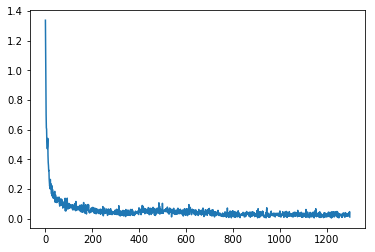

In [52]:
plt.figure()
plt.plot(model_training.losses)

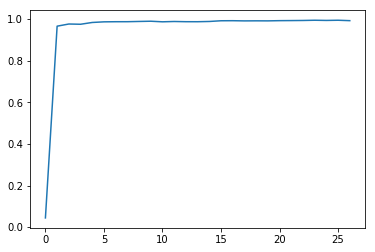

In [53]:
plt.figure()
plt.plot(model_training.accuracy)

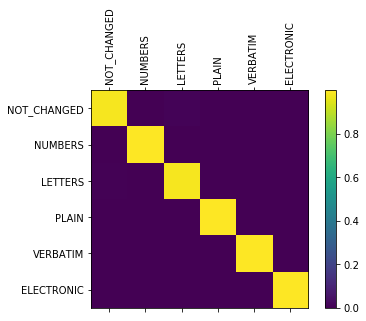

Accuracy: 99.29% (   49644/   50000)
CPU times: user 11min 18s, sys: 4.18 s, total: 11min 22s
Wall time: 2min 51s


In [54]:
%%time
plot_category_confusion_matrix(model, categories_all, test_model_single_sample, n_confusion=50000)

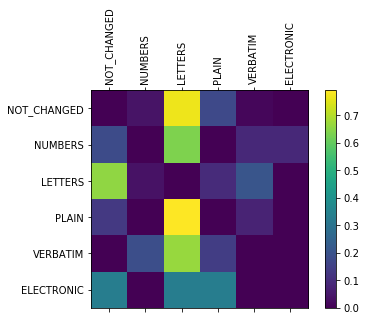

Accuracy: 99.30% (   49649/   50000)
CPU times: user 11min 15s, sys: 3.98 s, total: 11min 19s
Wall time: 2min 50s


In [55]:
%%time
plot_category_confusion_matrix(model, categories_all, test_model_single_sample,
                               n_confusion=50000, remove_diagonal=True)

In [35]:
def print_local_wrong_predictions(max_results=10):
    arr = get_some_wrong_predictions(model, test_model_single_sample, max_iterations=10000, max_results=max_results)
    for sample, predict, output in arr:
        s_bef, s_aft, s_class, s_sentence = sample
        m = torch.nn.functional.softmax(output).max().data[0]
        print("{:>11} -> {:>11} ({:0.3}) || {:>8} -> {} == {}".format(s_class, predict[0], m, s_bef, s_aft, ' '.join(s_sentence), ))
